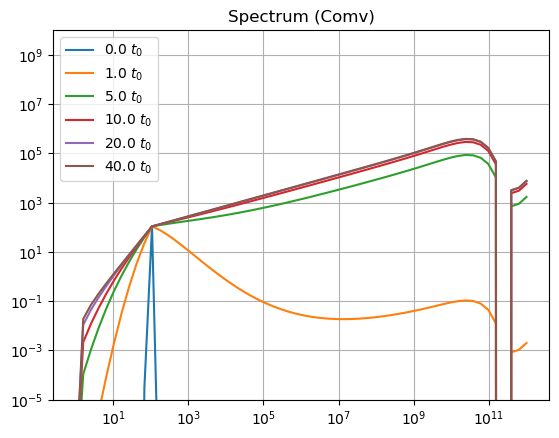

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import yaml
out_dir = '/home/wsy/Acc_MC/num_sols/results/'

def normalized(arr):
    arr = (arr-np.min(arr))/(np.max(arr)-np.min(arr))
    return arr

with open('/home/wsy/Acc_MC/MC_sim/paras.yaml', 'r') as f:
    config = yaml.safe_load(f)
x_min, x_max = 0,12 # 对数格点
Nu = int(config['N_grids']) # 格点数
x = np.linspace(x_min,x_max,Nu) # x空间上的均匀网格
dx = (x_max - x_min)/(Nu - 1) # 步长
gamma = 10**x # 转换到能量
file = np.loadtxt(out_dir+'solutions.txt')
N_bins = int(config['N_bins']) # 时间步长
idx_list = [0,100000,500000, 1000000, 2000000, 4000000]
plt.figure()
plt.title('Spectrum (Comv)')
for i in idx_list:
    dense_N = normalized(file[i,:])
    plt.plot(gamma, gamma*dense_N ,label = r'%s $t_0$'%(i/N_bins))
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-5, 1e10)
plt.grid(True)
plt.show()
